In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [77]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
column_types = {"pascal_voc_metric_by_distance":"float32"}

In [72]:
equine_srep_v2 = pd.read_csv("../../Slides/Equine-SREP-V2.csv", sep=",")
equine_srep_v2 = equine_srep_v2[equine_srep_v2["epoch"] != "epoch"]
equine_srep_v2["epoch"] = list(range(len(equine_srep_v2)))
equine_srep_v2["version"] = "V2"
equine_srep_v2 = equine_srep_v2.astype(column_types)
equine_srep_v2.head()

,epoch,train_loss,valid_loss,pascal_voc_metric_by_distance,BBloss,focal_loss,AP-0,AP-1,AP-2,AP-3,AP-4,time,version
0,0,0.714861,0.474820,0.303633,0.108422,0.366399,0.457838,0.435528,0.192402,0.424279,0.008121,05:06,V2
1,1,0.387344,0.349365,0.477583,0.078971,0.270394,0.387057,0.644283,0.559821,0.297247,0.499503,04:46,V2
2,2,0.283938,0.268554,0.645735,0.060674,0.207879,0.656379,0.732530,0.606392,0.486666,0.746709,04:41,V2
4,3,0.288005,0.306996,0.636124,0.068477,0.238519,0.656383,0.678618,0.497853,0.611768,0.735999,04:42,V2
5,4,0.357535,0.404389,0.459541,0.114362,0.290027,0.394242,0.733568,0.327621,0.521519,0.320753,04:37,V2


In [73]:
df = pd.read_csv("../../Slides/Equine-SREP-V2-FineTune.csv")
df = df[df["epoch"] != "epoch"]
df["epoch"] = list(range(len(df)))
df["version"] = "V2-FineTune"
df = df.astype(column_types)

equine_srep_v2 = equine_srep_v2.append(df)

df.head()

,epoch,train_loss,valid_loss,pascal_voc_metric_by_distance,BBloss,focal_loss,AP-0,AP-1,AP-2,AP-3,AP-4,time,version
0,0,0.218972,0.272407,0.688362,0.061705,0.210702,0.727843,0.554404,0.668569,0.731611,0.759381,04:17,V2-FineTune
1,1,0.209277,0.208322,0.709973,0.046093,0.162229,0.723530,0.750418,0.719690,0.630973,0.725252,04:11,V2-FineTune
2,2,0.180356,0.182431,0.751165,0.039844,0.142587,0.747332,0.793199,0.722523,0.697136,0.795636,04:11,V2-FineTune
4,3,0.177252,0.192041,0.731232,0.041470,0.150572,0.723181,0.753053,0.778564,0.634446,0.766914,04:15,V2-FineTune
5,4,0.208110,0.255759,0.626066,0.047904,0.207855,0.552501,0.570619,0.679333,0.709618,0.618257,04:11,V2-FineTune


In [74]:
for i in range(5):
    
    df = pd.read_csv("../../Slides/Equine-SREP-V2-FineTune-Ablation_{0}.csv".format(i))
    df = df[df["epoch"] != "epoch"]
    df["epoch"] = list(range(len(df)))
    df["version"] = "V2-FineTune-{}".format(i)
    df = df.astype(column_types)
    
    #equine_srep_v2 = equine_srep_v2.append(df)

In [75]:
equine_srep_v2

,epoch,train_loss,valid_loss,pascal_voc_metric_by_distance,BBloss,focal_loss,AP-0,AP-1,AP-2,AP-3,AP-4,time,version
0,0,0.714861,0.474820,0.303633,0.108422,0.366399,0.457838,0.435528,0.192402,0.424279,0.008121,05:06,V2
1,1,0.387344,0.349365,0.477583,0.078971,0.270394,0.387057,0.644283,0.559821,0.297247,0.499503,04:46,V2
2,2,0.283938,0.268554,0.645735,0.060674,0.207879,0.656379,0.732530,0.606392,0.486666,0.746709,04:41,V2
4,3,0.288005,0.306996,0.636124,0.068477,0.238519,0.656383,0.678618,0.497853,0.611768,0.735999,04:42,V2
5,4,0.357535,0.404389,0.459541,0.114362,0.290027,0.394242,0.733568,0.327621,0.521519,0.320753,04:37,V2
6,5,0.367409,0.432079,0.313852,0.087691,0.344388,0.415530,0.439669,0.131353,0.396186,0.186523,04:16,V2
7,6,0.375671,0.385099,0.451811,0.077791,0.307308,0.539756,0.490531,0.323946,0.443893,0.460931,04:14,V2
8,7,0.301399,0.315775,0.538183,0.071574,0.244200,0.664498,0.727937,0.458234,0.422793,0.417455,04:22,V2
9,8,0.275467,0.285103,0.622221,0.067502,0.217602,0.694509,0.683562,0.707891,0.348172,0.676974,04:29,V2
10,9,0.247487,0.259136,0.653011,0.060345,0.198791,0.622671,0.734055,0.649637,0.626478,0.632214,04:24,V2


<AxesSubplot:xlabel='epoch', ylabel='pascal_voc_metric_by_distance'>

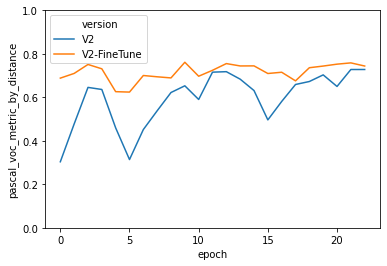

In [78]:
plt.ylim(0, 1)
sns.lineplot(x="epoch", y="pascal_voc_metric_by_distance", hue="version", data=equine_srep_v2)